Rede Erdos-Renyi

In [23]:
import networkx as nx
import numpy as np

N = 3000
p = 10**-3

random_graph = nx.erdos_renyi_graph(N, p)

# Salvar a rede em formato GML
nx.write_gml(random_graph, "random_network.gml")


Qual é o número de links esperados?

In [18]:
expected_numbers = N * (N - 1) * p / 2
print(expected_numbers)


4498.5


Isso vai de acordo com o que foi observado na rede criada?

R: Foi muito próximo ao observado, visto que consta no Gephi 4487 arestas.

 Em qual regime essa rede se encontra (subcritical, critical, supercritical ou connected)?

In [24]:
# Calcular o valor crítico 1/N
k = p * (N - 1)

# Calcular o número de componentes conectados
num_components = nx.number_connected_components(random_graph)

# Determinar em qual regime a rede se encontra
if k < 1:
    regime = "Subcrítico"
elif k == 1:
    regime = "Crítico"
elif k > 1:
    regime = "Supercrítico"
elif k > np.log(N):
    regime = "Conectado"

print(f"Numero de componentes conectados: {num_components}")
print(f"A rede está no regime: {regime}")

Numero de componentes conectados: 188
A rede está no regime: Supercrítico


Compare a visualização da rede do exercício 1 com a visualização feita na 2c.

R: A rede do exercicio 1 possui muitos outliers e é muito concentrada. Por outro lado, a rede feito no exercicio 2c é melhor distribuida com poucos outliers

Compute a distribuição de graus do GraphMissingEdges.gml

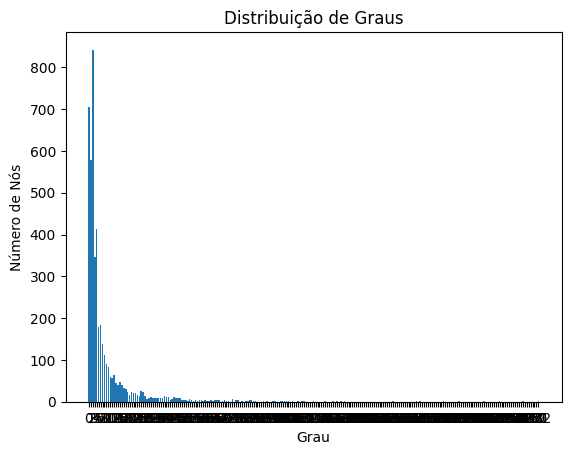

In [20]:
import matplotlib.pyplot as plt

# Carregar o grafo a partir do arquivo GML
graph = nx.read_gml("GraphMissingEdges.gml")

# Calcular a distribuição de graus
degree_sequence = [d for n, d in graph.degree()]

# Calcular o histograma da distribuição de graus
degree_counts = nx.degree_histogram(graph)

# Plotar a distribuição de graus
plt.bar(range(len(degree_counts)), degree_counts, tick_label=range(len(degree_counts)))
plt.xlabel("Grau")
plt.ylabel("Número de Nós")
plt.title("Distribuição de Graus")
plt.show()

Compute a distribuição de graus para duas redes aleatórias com o mesmo número de nós
e não direcionadas, mas uma com p=0,001 e outra com p =0,01.

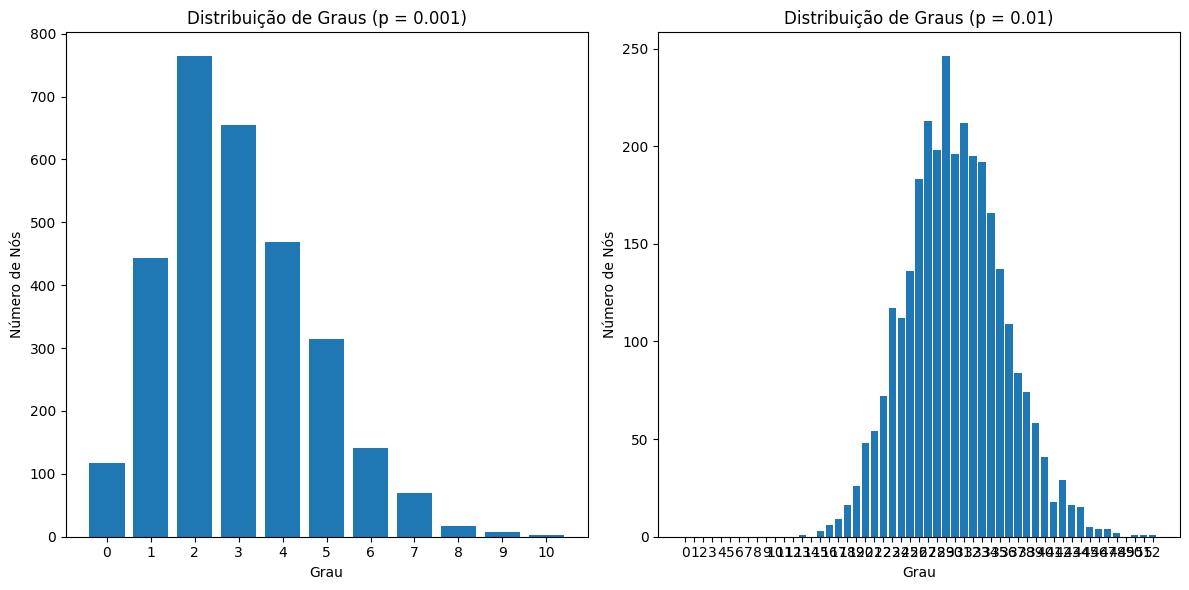

In [21]:
# Número de nós nas redes
N = 3000

# Probabilidades de conexão
p1 = 0.001
p2 = 0.01

# Criação das redes aleatórias Erdos-Renyi com diferentes probabilidades
graph1 = nx.erdos_renyi_graph(N, p1)
graph2 = nx.erdos_renyi_graph(N, p2)

# Cálculo das distribuições de graus para cada rede
degree_sequence1 = [d for n, d in graph1.degree()]
degree_sequence2 = [d for n, d in graph2.degree()]

# Cálculo dos histogramas das distribuições de graus
degree_counts1 = nx.degree_histogram(graph1)
degree_counts2 = nx.degree_histogram(graph2)

# Plotagem das distribuições de graus
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.bar(range(len(degree_counts1)), degree_counts1, tick_label=range(len(degree_counts1)))
plt.xlabel("Grau")
plt.ylabel("Número de Nós")
plt.title(f"Distribuição de Graus (p = {p1})")

plt.subplot(122)
plt.bar(range(len(degree_counts2)), degree_counts2, tick_label=range(len(degree_counts2)))
plt.xlabel("Grau")
plt.ylabel("Número de Nós")
plt.title(f"Distribuição de Graus (p = {p2})")

plt.tight_layout()
plt.show()


A rede do desafio (GraphMissingEdges.gml) possui características de redes aleatórias? Justifique a sua resposta.

A rede não parece ser uma rede aleatória.


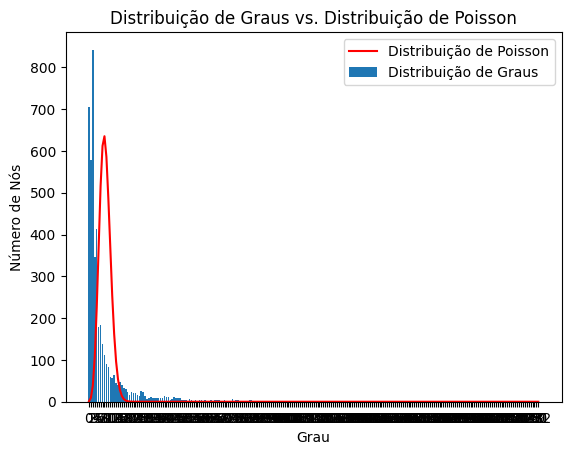

In [25]:
from scipy.stats import poisson

# Carrega o grafo a partir do arquivo GML
graph = nx.read_gml("GraphMissingEdges.gml")

# Calcula a distribuição de graus
degree_sequence = [d for n, d in graph.degree()]

# Calcula o histograma da distribuição de graus
degree_counts = nx.degree_histogram(graph)

# Valor médio de grau
mean_degree = np.mean(degree_sequence)

# Calcula a distribuição de Poisson esperada
poisson_values = poisson.pmf(range(len(degree_counts)), mean_degree)

is_random = True  # Assuma inicialmente que é uma rede aleatória

# Comparação visual com a distribuição de Poisson
plt.bar(range(len(degree_counts)), degree_counts, tick_label=range(len(degree_counts)), label="Distribuição de Graus")
plt.plot(range(len(degree_counts)), poisson_values * len(degree_sequence), 'r', label="Distribuição de Poisson")
plt.xlabel("Grau")
plt.ylabel("Número de Nós")
plt.title("Distribuição de Graus vs. Distribuição de Poisson")
plt.legend()

# Critério 1: Verificação do coeficiente de aglomeração médio
average_clustering = nx.average_clustering(graph)
if average_clustering > 0.1:  # Valor de corte arbitrário
    is_random = False

# Critério 2: Verificação de hubs (nós com graus muito maiores do que a média)
degree_threshold = 3 * mean_degree  # Valor de corte arbitrário
if any(d > degree_threshold for d in degree_sequence):
    is_random = False

# Resultado final
if is_random:
    print("A rede parece ser uma rede aleatória.")
else:
    print("A rede não parece ser uma rede aleatória.")

plt.show()